## DataSet : California Housing Prices
## Modal : Simple Linear Regression
## Owner  : Danish Yousuf

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
from sklearn import preprocessing

In [4]:
%matplotlib inline

In [6]:
df= pd.read_csv("BostonHousing.csv")


In [7]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### FEATURES/INDEPENDENT VARIABLES in Dataset

1) CRIM:- Per Capita crime rate by town

2) ZN:- Proportion of residential land zoned for lots over 25,000 sqft

3) INDUS:- Proportion of non retail business acres per town.

4) CHAS:- Charles river dummy variable== 1 -> if tract bounds river, 0 -> otherwise

5) NOX:- Nitric Oxides concentration [parts per 10 million]

6) RM: average number of rooms per dwelling

7) AGE: proportion of owner-occupied units built prior to 1940

8) DIS: weighted distances to five Boston employment centres

9) RAD: index of accessibility to radial highways

10) TAX: full-value property-tax rate per  10,000[
 /10k]

11) PTRATIO: pupil-teacher ratio by town

12) B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

13) LSTAT: % lower status of the population

### TARGET VARIABLE/DEPENDENT VARIABLE in Dataset

1) MEDV: Median value of owner-occupied homes in  1000′s[k
 ]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [20]:
new_df=df.copy()
new_df.loc[:, 'rm'].fillna(df['rm'].mean())
new_df.to_csv('correced data set')
new_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [21]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


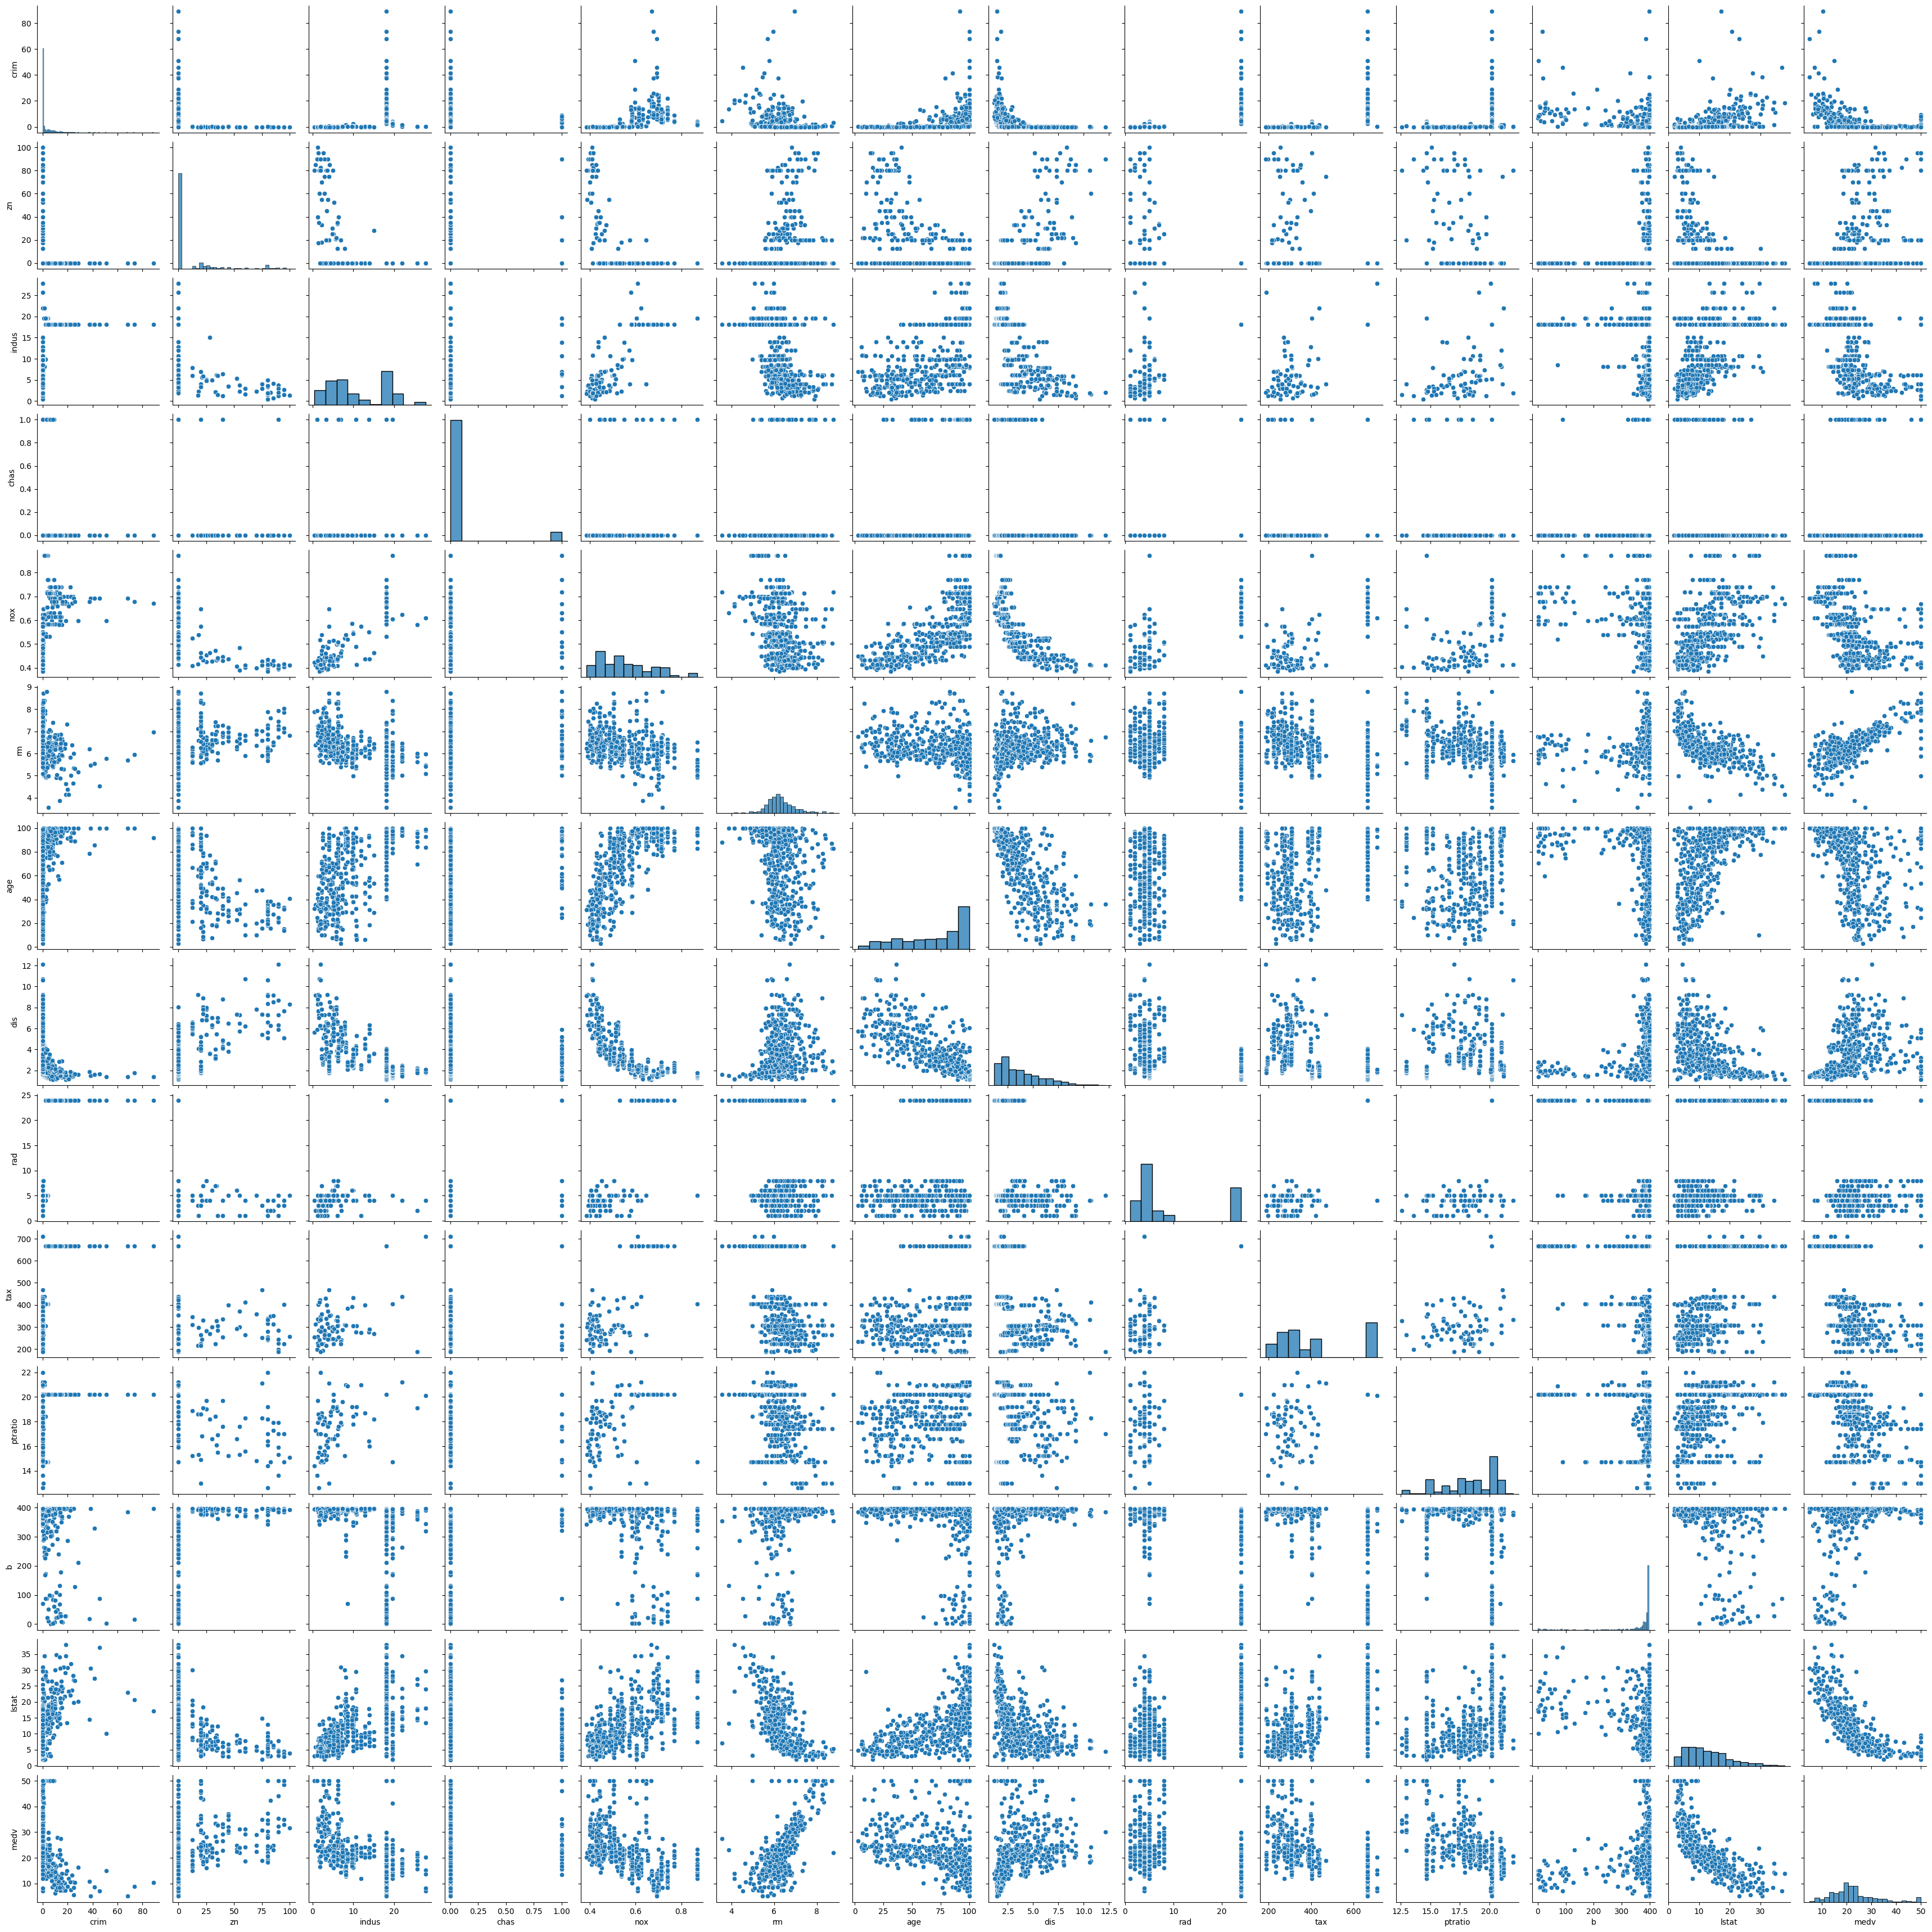

In [22]:
sns.pairplot(new_df)

In [31]:
new_df['medv'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

<Axes: >

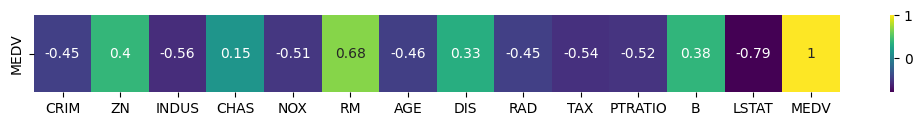

In [178]:
plt.figure(figsize=(13, 1))
sns.heatmap(new_df.corr().tail(1),annot=True ,cmap='viridis')

In [28]:
new_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Length: 506, dtype: bool

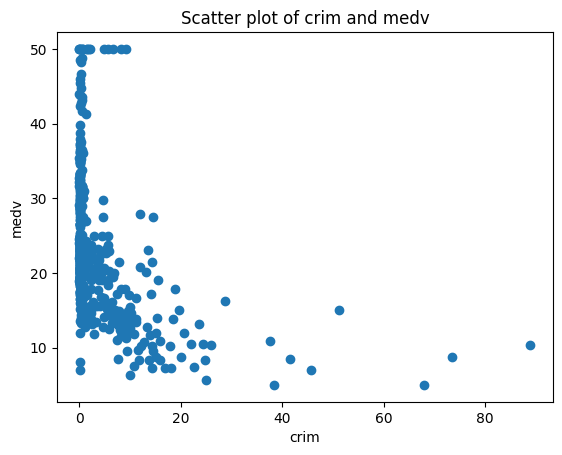

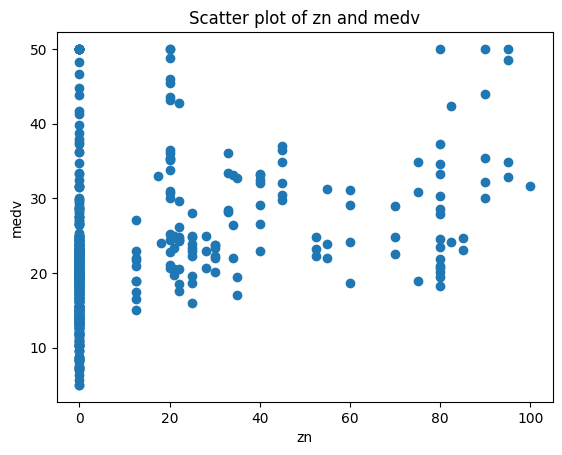

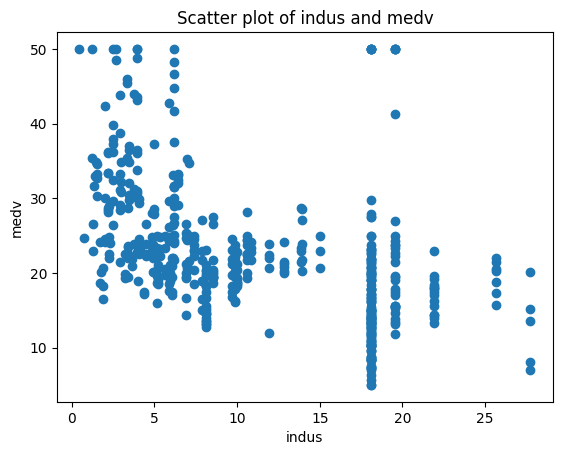

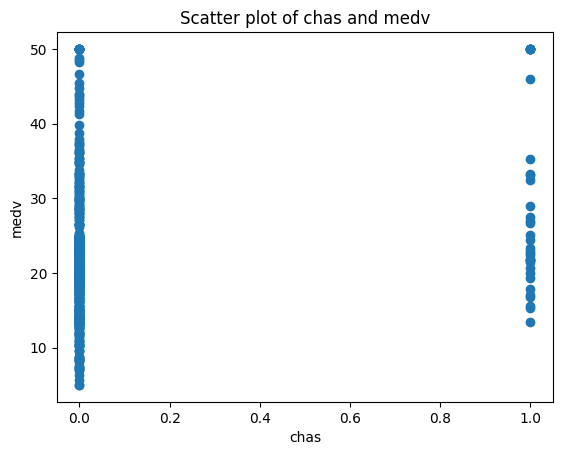

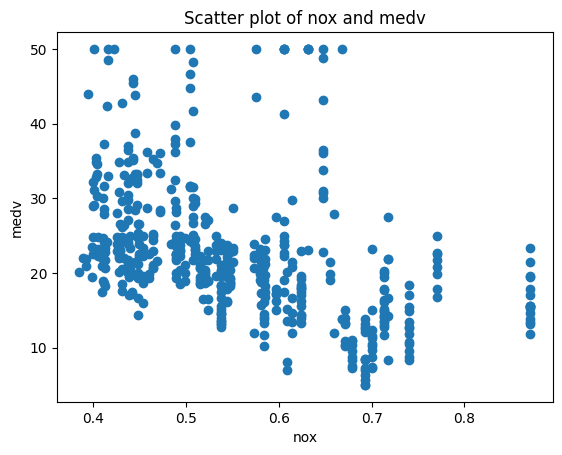

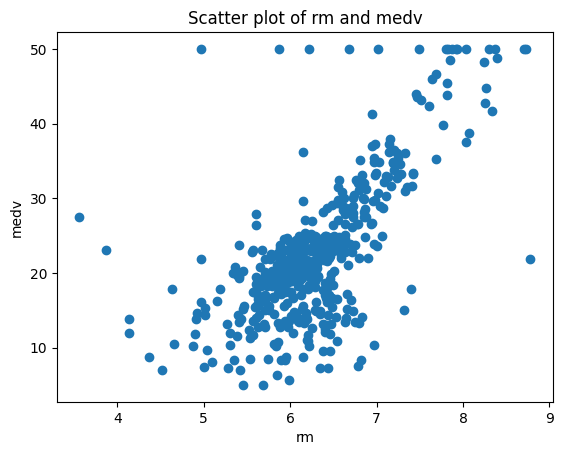

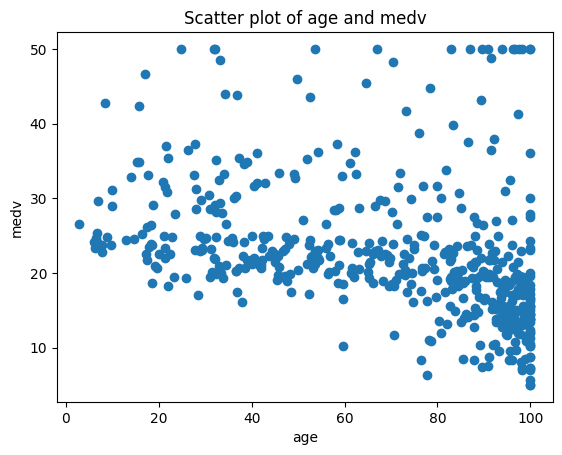

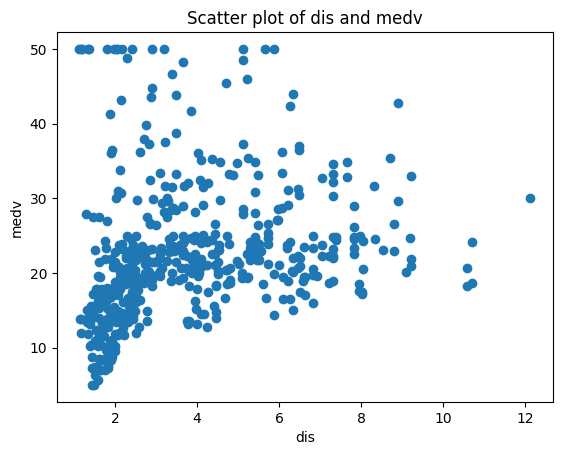

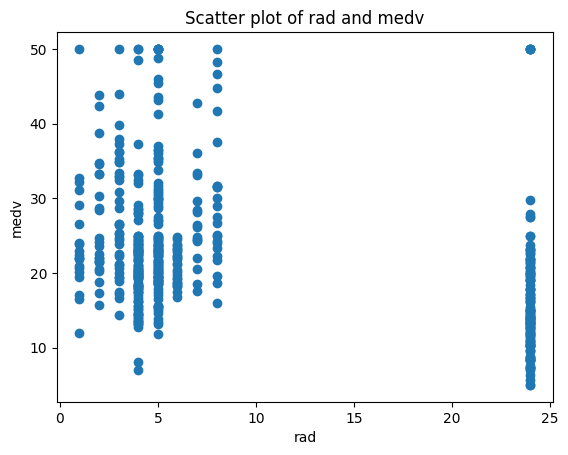

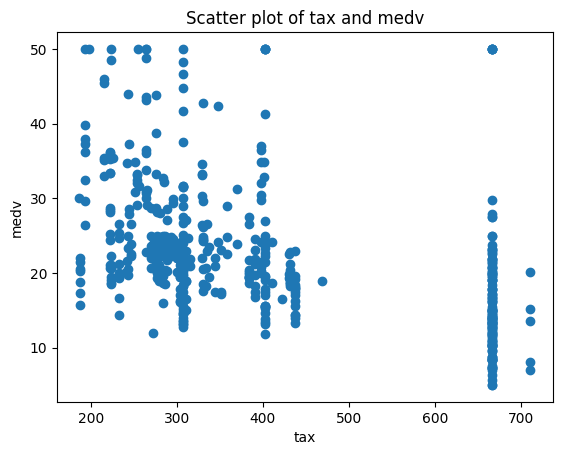

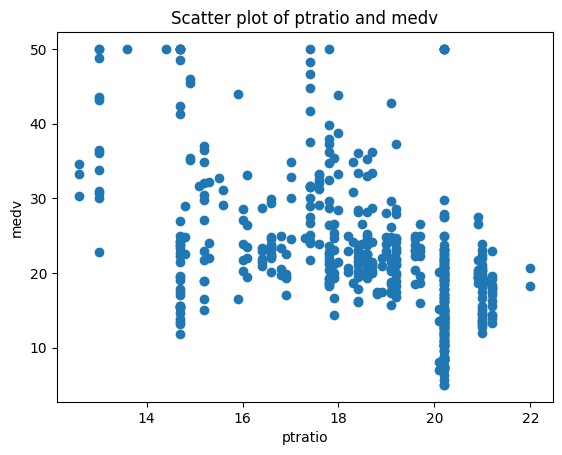

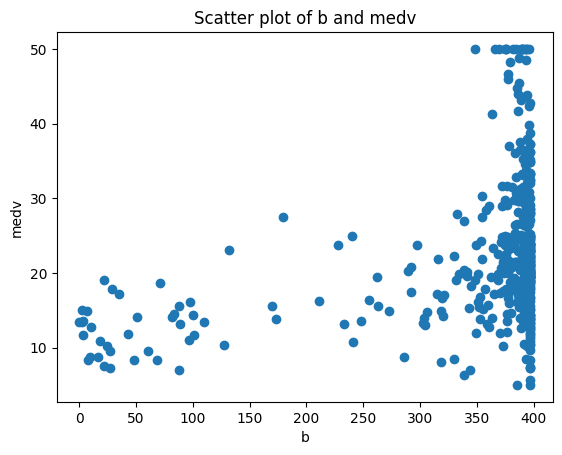

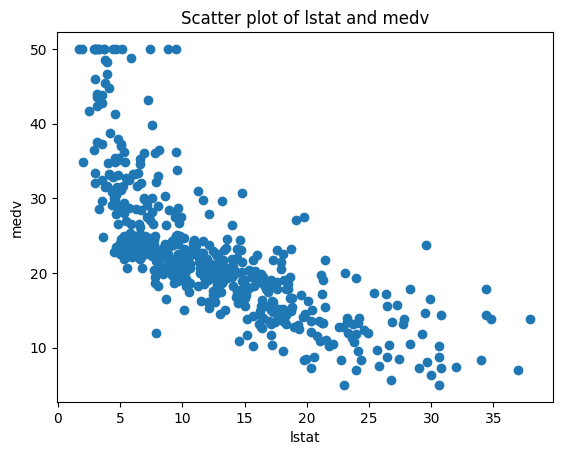

In [34]:
x_name=new_df.columns[0:13]
y_name=new_df.columns[-1]
def ploting(i,j):
    plt.scatter(new_df[i],df[j])
    plt.xlabel(i)
    plt.ylabel(j)
    plt.title("Scatter plot of "+i+" and "+j)
    plt.show()
for i in x_name:
    ploting(i,y_name)

<Axes: xlabel='medv'>

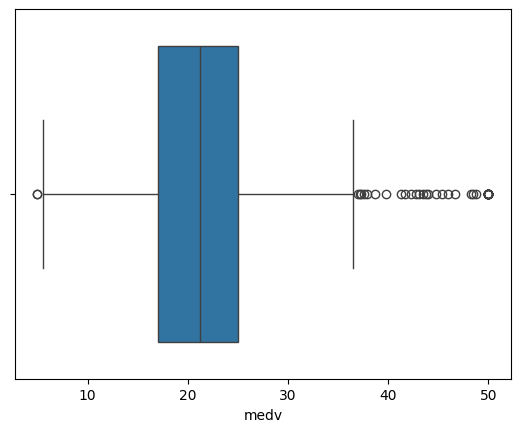

In [36]:
sns.boxplot(x='medv',data=new_df)

In [40]:
np.where(df['medv']>50)

(array([], dtype=int64),)

<Axes: ylabel='medv'>

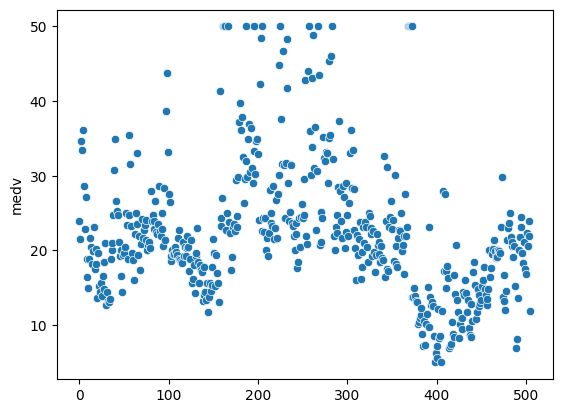

In [42]:
sns.scatterplot(df['medv'])

## STANDARDISATION

In [46]:
scale=preprocessing.StandardScaler()

In [49]:
new_df=scale.fit_transform(new_df)

In [54]:
columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df=pd.DataFrame(data=new_df,columns=columns)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.414403,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194840,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.284104,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.017491,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.229926,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503


In [57]:
np.round(df['MEDV'],3)

0      0.160
1     -0.102
2      1.324
3      1.183
4      1.488
       ...  
501   -0.014
502   -0.210
503    0.149
504   -0.058
505   -1.157
Name: MEDV, Length: 506, dtype: float64

In [59]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.000000,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.000000,506.000000,5.060000e+02,5.060000e+02,5.060000e+02
mean,2.808469e-17,-7.459997e-17,8.425408e-17,3.510587e-17,0.000000,2.457411e-17,-2.808469e-17,-2.808469e-17,1.123388e-16,0.000000,0.000000,-1.404235e-17,-4.212704e-17,1.404235e-17
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990,1.000990,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882,-3.882772e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990,-2.707379,-3.907193e+00,-1.531127e+00,-1.908226e+00
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-0.913029,-5.686434e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-0.767576,-0.488039,2.050715e-01,-7.994200e-01,-5.994557e-01
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-0.144217,-1.059913e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-0.464673,0.274859,3.811865e-01,-1.812536e-01,-1.450593e-01
75%,7.396560e-03,4.877224e-02,1.015999e+00,-2.725986e-01,0.598679,4.767793e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926,0.806576,4.336510e-01,6.030188e-01,2.685231e-01
max,9.933931e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346,3.558156e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194,1.638828,4.410519e-01,3.548771e+00,2.989460e+00


<Axes: xlabel='MEDV'>

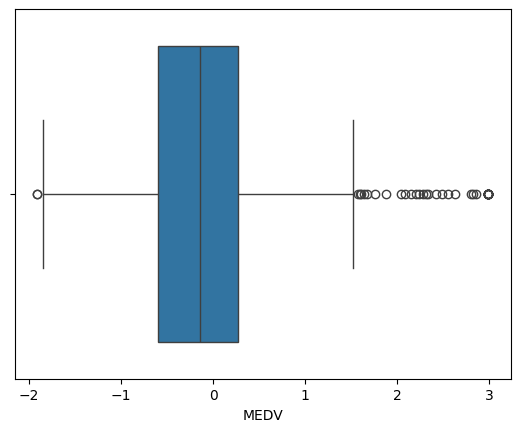

In [60]:
sns.boxplot(x=df['MEDV'])

<Axes: ylabel='MEDV'>

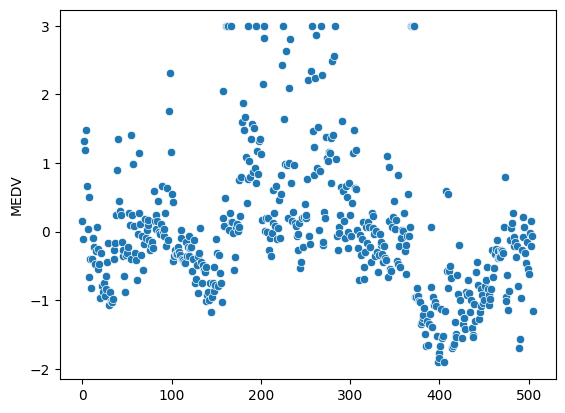

In [66]:
sns.scatterplot(df['MEDV'])

In [72]:
q1=df['MEDV'].quantile(.25)
q3=df['MEDV'].quantile(.75)
iqr=q3-q1


In [73]:
q1,q3,iqr

(np.float64(-0.5994557469772859),
 np.float64(0.2685231362336762),
 np.float64(0.8679788832109621))

In [76]:
ul=q3+1.5*iqr
ll=q1-1.5*iqr

In [78]:
ul,ll

(np.float64(1.5704914610501193), np.float64(-1.901424071793729))

<Axes: xlabel='MEDV'>

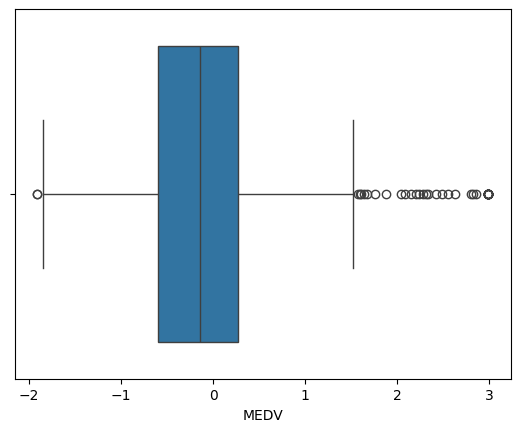

In [79]:
sns.boxplot(x=df['MEDV'])

In [86]:
df.loc[(df['MEDV'] > ul) | (df['MEDV'] < ll)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
97,-0.406456,-0.487722,-1.203282,-0.272599,-0.947582,2.544456,0.264041,-0.142536,-0.867883,-0.785394,-0.210622,0.441052,-1.183496,1.759597
98,-0.410990,-0.487722,-1.203282,-0.272599,-0.947582,2.189447,-1.126378,-0.142536,-0.867883,-0.785394,-0.210622,0.404102,-1.273207,2.314668
157,-0.278125,-0.487722,1.231945,-0.272599,0.434551,0.939075,1.025037,-0.911636,-0.523001,-0.031105,-1.736418,0.074075,-1.130230,2.042574
161,-0.250221,-0.487722,1.231945,-0.272599,0.434551,1.717528,0.790337,-0.867141,-0.523001,-0.031105,-1.736418,0.194683,-1.531127,2.989460
162,-0.207116,-0.487722,1.231945,3.668398,0.434551,2.163784,1.053485,-0.833960,-0.523001,-0.031105,-1.736418,0.361122,-1.504494,2.989460
163,-0.243744,-0.487722,1.231945,3.668398,0.434551,2.980732,0.900575,-0.776298,-0.523001,-0.031105,-1.736418,0.348403,-1.308251,2.989460
166,-0.186585,-0.487722,1.231945,-0.272599,0.434551,2.344853,0.982364,-0.831488,-0.523001,-0.031105,-1.736418,0.138436,-1.254985,2.989460
179,-0.413791,-0.487722,-1.266023,-0.272599,-0.576134,0.991827,-0.361825,-0.459227,-0.752922,-1.278354,-0.303094,0.441052,-1.067152,1.596340
180,-0.412851,-0.487722,-1.266023,-0.272599,-0.576134,2.111032,0.523633,-0.501059,-0.752922,-1.278354,-0.303094,0.426360,-0.713914,1.879318
182,-0.409924,-0.487722,-1.266023,-0.272599,-0.576134,1.241331,0.840122,-0.520264,-0.752922,-1.278354,-0.303094,0.410571,-1.097990,1.672527


In [90]:
new_df = df.loc[(df['MEDV'] < ul) & (df['MEDV'] > ll)]
print('before removing outliers: ', len(df))
print('after removing outliers: ', len(new_df))
print('outliers: ', len(df)-len(new_df))

before removing outliers:  506
after removing outliers:  466
outliers:  40


<Axes: xlabel='MEDV'>

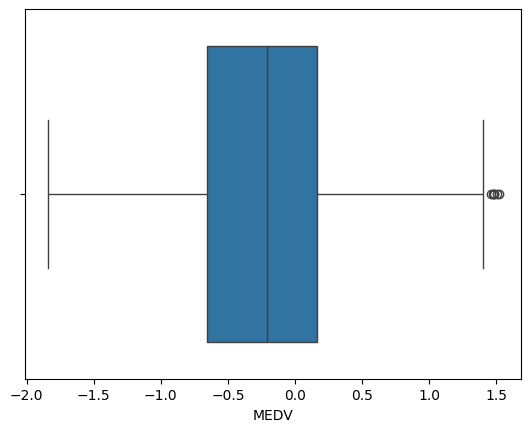

In [91]:
sns.boxplot(x=new_df['MEDV'])

In [93]:
new_df = df.copy()
new_df.loc[(new_df['MEDV']<ll),'MEDV']=ll
new_df.loc[(new_df['MEDV']>ul),'MEDV'] = ul


<Axes: xlabel='MEDV'>

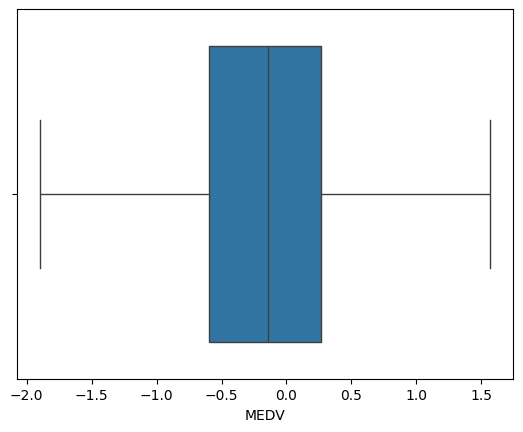

In [95]:
sns.boxplot(x=new_df['MEDV'])

<Axes: ylabel='MEDV'>

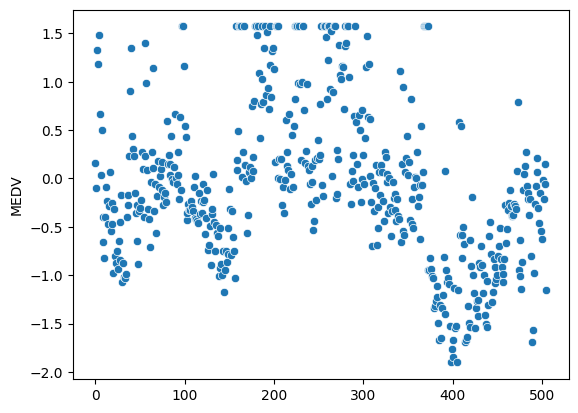

In [98]:
sns.scatterplot(new_df['MEDV'])

In [100]:
new_df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.414403,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194840,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.284104,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.017491,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.229926,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503
5,-0.417044,-0.487722,-1.306878,-0.272599,-0.835284,0.207671,-0.351157,1.077737,-0.752922,-1.106115,0.113032,0.410571,-1.043322,0.671222
6,-0.410243,0.048772,-0.476654,-0.272599,-0.265154,-0.388287,-0.070229,0.839244,-0.523001,-0.577519,-1.505237,0.426798,-0.031268,0.039964
7,-0.403696,0.048772,-0.476654,-0.272599,-0.265154,-0.160169,0.978808,1.024638,-0.523001,-0.577519,-1.505237,0.441052,0.910700,0.497082
8,-0.395935,0.048772,-0.476654,-0.272599,-0.265154,-0.931494,1.117494,1.087196,-0.523001,-0.577519,-1.505237,0.328448,2.421774,-0.656595
9,-0.400729,0.048772,-0.476654,-0.272599,-0.265154,-0.399693,0.616090,1.329635,-0.523001,-0.577519,-1.505237,0.329325,0.623344,-0.395385


In [101]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [103]:
new_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.000000,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.000000,506.000000,5.060000e+02,5.060000e+02,506.000000
mean,2.808469e-17,-7.459997e-17,8.425408e-17,3.510587e-17,0.000000,2.457411e-17,-2.808469e-17,-2.808469e-17,1.123388e-16,0.000000,0.000000,-1.404235e-17,-4.212704e-17,-0.071368
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990,1.000990,1.000990e+00,1.000990e+00,0.827489
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882,-3.882772e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990,-2.707379,-3.907193e+00,-1.531127e+00,-1.901424
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-0.913029,-5.686434e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-0.767576,-0.488039,2.050715e-01,-7.994200e-01,-0.599456
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-0.144217,-1.059913e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-0.464673,0.274859,3.811865e-01,-1.812536e-01,-0.145059
75%,7.396560e-03,4.877224e-02,1.015999e+00,-2.725986e-01,0.598679,4.767793e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926,0.806576,4.336510e-01,6.030188e-01,0.268523
max,9.933931e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346,3.558156e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194,1.638828,4.410519e-01,3.548771e+00,1.570491


In [105]:
new_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [117]:
X = new_df.drop("MEDV", axis=1)
y = new_df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state= 31)

In [118]:
print("Shape of the train dataset features")
print(X_train.shape)
print("Shape of the test dataset features")
print(X_test.shape)

Shape of the train dataset features
(430, 13)
Shape of the test dataset features
(76, 13)


In [121]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [124]:
model.intercept_

np.float64(-0.07088561084257793)

In [126]:
model.coef_

array([-0.11139449,  0.07795433, -0.02814529,  0.0365277 , -0.17841113,
        0.17736551, -0.03009267, -0.27047378,  0.22709372, -0.1780837 ,
       -0.19129648,  0.08932514, -0.35364848])

In [130]:
cdf=pd.DataFrame(model.coef_,X_train.columns,columns=["Coeff"])
cdf

,Coeff
CRIM,-0.111394
ZN,0.077954
INDUS,-0.028145
CHAS,0.036528
NOX,-0.178411
RM,0.177366
AGE,-0.030093
DIS,-0.270474
RAD,0.227094
TAX,-0.178084


In [134]:
predictions=model.predict(X_test)

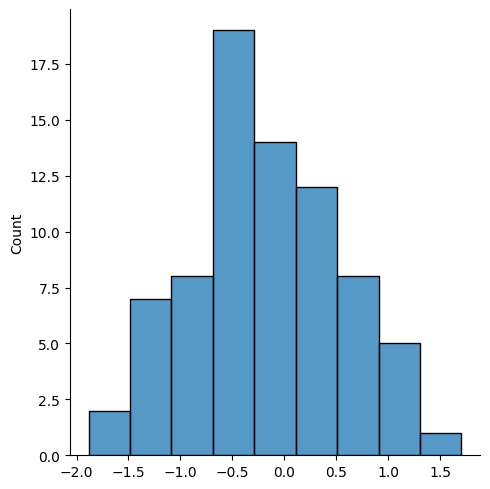

In [139]:
sns.displot(predictions)

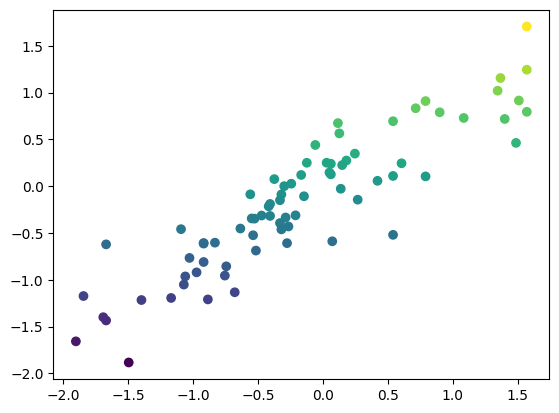

In [145]:
colors = predictions
plt.scatter(y_test,predictions,c=colors, cmap='viridis' )

In [150]:
cmp=pd.DataFrame({"Actual ":y_test ,"predicted ": predictions})
cmp.head()

,Actual,predicted
4,1.487503,0.461713
385,-1.668784,-1.434587
318,0.061732,0.125953
113,-0.417153,-0.215787
37,-0.166827,0.119247


In [152]:
metrics.mean_absolute_error(y_test,predictions)

np.float64(0.295244099484372)

In [154]:
metrics.mean_squared_error(y_test,predictions)

np.float64(0.14261490115029818)

In [165]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

np.float64(0.3776438813886678)

<Axes: >

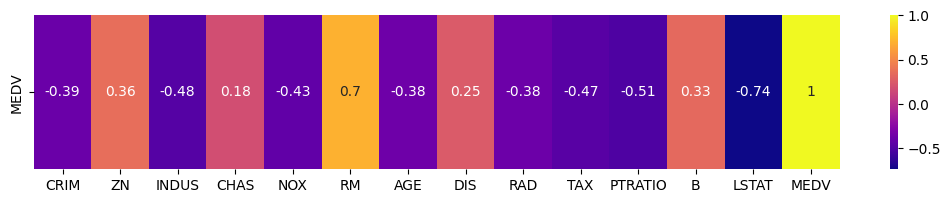

In [177]:
plt.figure(figsize=(13, 2))
sns.heatmap(df.corr().tail(1),annot=True,cmap='plasma')

## probability 

In [163]:
mape=np.mean(np.abs((y_test-predictions)/y_test)*100)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Percentage Error (MAPE): 97.59%


In [164]:
model.score(X_test,y_test)

0.8075261886448182